Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Load the Dataset and Preprocess the Data

In [ ]:
# Load the dataset
dataset_path = '/content/Mall_Customers.csv'
df = pd.read_csv(dataset_path)

# Data Preprocessing
print("Dataset Info:")
print(df.info())

# Checking the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# We will drop the 'CustomerID' column as it is not useful for clustering
df = df.drop(columns=['CustomerID'])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Standardizing the Data

In [ ]:
# We will use 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Plot the Elbow graph

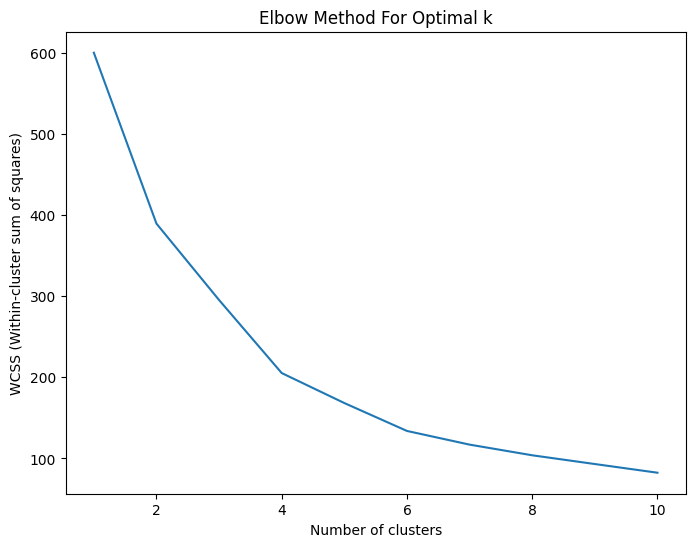

In [ ]:
# Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

In [ ]:
# From the Elbow method, choose the optimal number of clusters (let's assume it's 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Visualizing the clusters
pca = PCA(n_components=2)  # Reducing dimensions to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

Visualize the Clusters

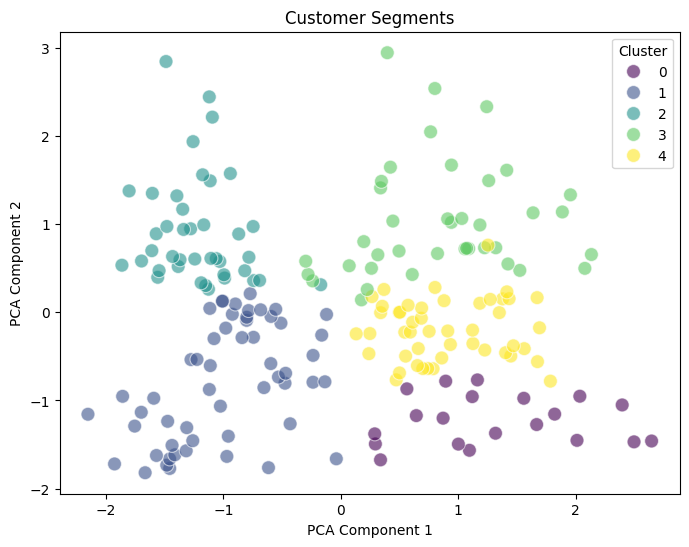

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


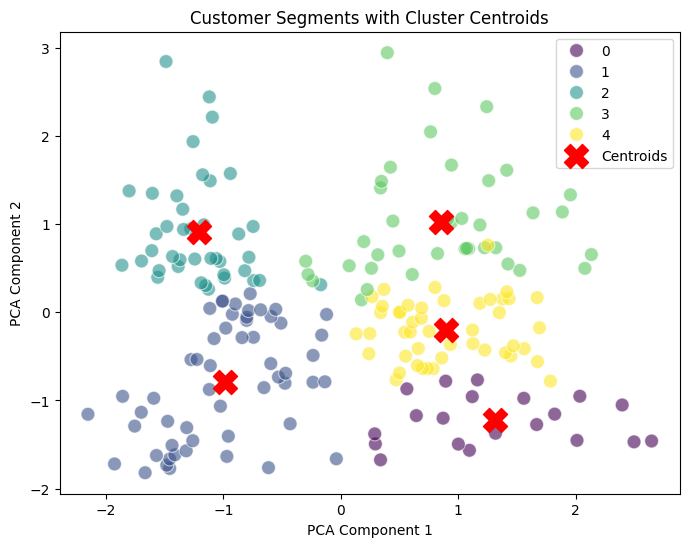

In [ ]:
# Display the centers of the clusters in 2D space
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments with Cluster Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [ ]:
# Show the number of customers in each cluster
print("\nNumber of customers in each cluster:")
print(df['Cluster'].value_counts())

# Show the centroids of the clusters in the original feature space
print("\nCentroids of the clusters:")
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(centroids)


Number of customers in each cluster:
Cluster
1    54
4    47
2    40
3    39
0    20
Name: count, dtype: int64

Centroids of the clusters:
        Age  Annual Income (k$)  Spending Score (1-100)
0  0.531074           -1.290508               -1.236467
1 -0.980679           -0.743060                0.467440
2 -0.428806            0.974847                1.216085
3  0.073331            0.974945               -1.197297
4  1.204841           -0.235773               -0.052368
